In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.spatial.distance import euclidean
import time
%matplotlib inline

In [2]:
cd ../

/home/meni/Documents/PyCharm/pydp


In [3]:
from src.cluster import find
from tests.__non_private_cluster__ import *

In [5]:
xls = pd.ExcelFile('./test_data_sets/AirQualityUCI.xlsx')
xls.sheet_names

[u'AirQualityUCI']

In [6]:
df = xls.parse('AirQualityUCI')
df.shape

(9357, 15)

In [7]:
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166,1056.25,113,1692.00,1267.50,13.600000,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103,1173.75,92,1558.75,972.25,13.300000,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131,1140.00,114,1554.50,1074.00,11.900000,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172,1092.00,122,1583.75,1203.25,11.000000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131,1205.00,116,1490.00,1110.00,11.150000,59.575001,0.788794
5,2004-03-10,23:00:00,1.2,1197.00,38,4.741012,750.25,89,1336.50,96,1393.00,949.25,11.175000,59.175000,0.784772
6,2004-03-11,00:00:00,1.2,1185.00,31,3.624399,689.50,62,1461.75,77,1332.75,732.50,11.325000,56.775000,0.760312
7,2004-03-11,01:00:00,1.0,1136.25,31,3.326677,672.00,62,1453.25,76,1332.75,729.50,10.675000,60.000000,0.770238
8,2004-03-11,02:00:00,0.9,1094.00,24,2.339416,608.50,45,1579.00,60,1276.00,619.50,10.650000,59.674999,0.764819
9,2004-03-11,03:00:00,0.6,1009.75,19,1.696658,560.75,-200,1705.00,-200,1234.75,501.25,10.250000,60.200001,0.751657


In [8]:
df[np.array([6,8])]

,PT08.S2(NMHC),PT08.S3(NOx)
0,1045.50,1056.25
1,954.75,1173.75
2,939.25,1140.00
3,948.25,1092.00
4,835.50,1205.00
5,750.25,1336.50
6,689.50,1461.75
7,672.00,1453.25
8,608.50,1579.00
9,560.75,1705.00


In [20]:
dft = df[np.array([6,8])]
dft = dft.dropna()
dfm = dft.as_matrix()
precision = 2
dfm_round = np.round(dfm, precision)
print dfm_round.shape
print np.allclose(dfm,dfm_round)

(9357, 2)
True


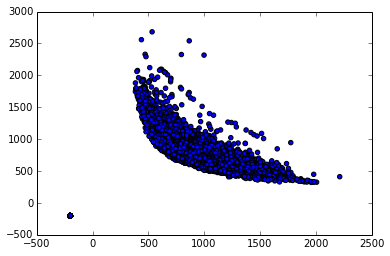

In [21]:
plt.scatter(*zip(*dfm))

In [35]:
desired_amount_of_points = 1500
test_radius, test_center = find_cluster(dfm, desired_amount_of_points)
ball = [p for p in dfm if euclidean(p, center) <= radius]
cluster = len(ball)

print "Test-radius: %f" % test_radius
print "Test-center: %s" % str(test_center)
print "Desired number of points in resulting ball: %d" % desired_amount_of_points
print "Number of points in the resulting ball: %d" % cluster

Test-radius: 109.779609
Test-center: [ 885.75  712.5 ]
Desired number of points in resulting ball: 1500
Number of points in the resulting ball: 866


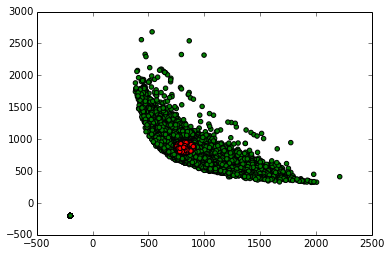

In [36]:
zipped_data = zip(*dfm)
plt.scatter(*zipped_data, c='g')
zipped_ball = zip(*ball)
plt.scatter(*zipped_ball, c='r')

In [39]:
dimension = 2
max_domain = np.ceil(max(abs(np.min(dfm)), np.max(dfm)))
domain = (max_domain, 10**-2)
approximation, failure, eps, delta = 0.1, 0.1, 0.5, 2**-10
start_time = time.time()

try:
    radius, center = find(dfm, dimension, domain, desired_amount_of_points, approximation, failure, eps, delta)
    ball = [p for p in dfm if euclidean(p, center) <= radius]
    cluster = len(ball)
except ValueError:
    radius, center, cluster = np.nan, np.nan, np.nan
    
print "Good-radius: %d" % radius
print "Good-center: %s" % str(center)
print "Desired number of points in resulting ball: %d" % desired_amount_of_points
print "Number of points in the resulting ball: %d" % cluster
print "run-time: %.2f second" % (time.time() - start_time)

Good-radius: 167
Good-center: [ 845.19041703  816.72679164]
Desired number of points in resulting ball: 1500
Number of points in the resulting ball: 2711
run-time: 300.79 second


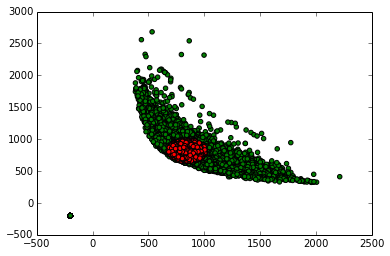

In [40]:
zipped_data = zip(*dfm)
plt.scatter(*zipped_data, c='g')
zipped_ball = zip(*ball)
plt.scatter(*zipped_ball, c='r')